In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial columns. 
application_df = application_df.drop(["EIN","STATUS"],axis = 1)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
NAME_counts = application_df["NAME"].value_counts()
NAME_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

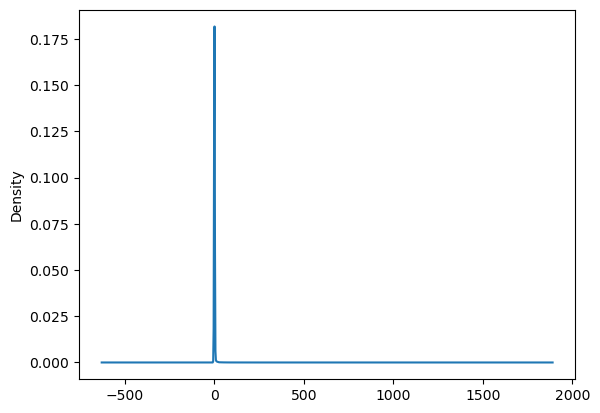

In [5]:
# Visualize the value counts of APPLICATION_TYPE
NAME_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_NAME = list(NAME_counts[NAME_counts < 10].index)

# Replace in dataframe
for name in replace_NAME:
    application_df.NAME = application_df.NAME.replace(name,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                      21022
PARENT BOOSTER USA INC                      1260
TOPS CLUB INC                                765
UNITED STATES BOWLING CONGRESS INC           700
WASHINGTON STATE UNIVERSITY                  492
                                           ...  
CASCADE 4-H FOUNDATION                        10
FREE & ACCEPTED MASONS OF WASHINGTON          10
NEW MEXICO GARDEN CLUBS INC                   10
NATIONAL ASSOCIATION OF HISPANIC NURSES       10
UNION OF CALIFORNIA STATE WORKERS             10
Name: NAME, Length: 223, dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df["APPLICATION_TYPE"].value_counts()
application_type_counts 

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

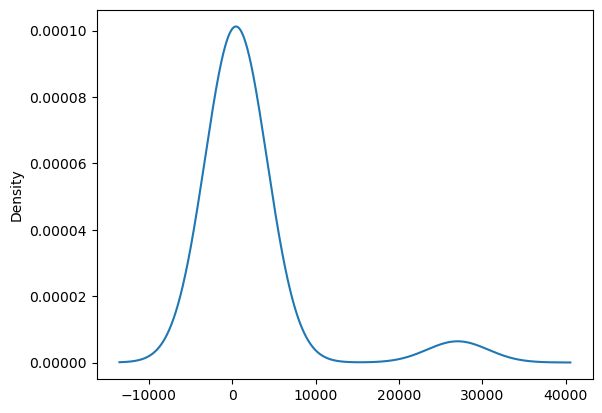

In [8]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 150].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [10]:
Classification_type_counts = application_df["CLASSIFICATION"].value_counts()
Classification_type_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

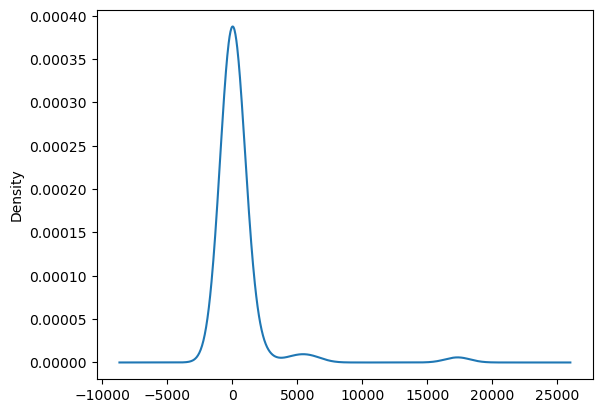

In [11]:
# Visualize the value counts of CLASSIFICATION
Classification_type_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(Classification_type_counts[Classification_type_counts < 15].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
Other      143
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
Name: CLASSIFICATION, dtype: int64

In [13]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/liuyidi/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


NAME_ACE MENTOR PROGRAM OF AMERICA INC  NAME_AIR FORCE ASSOCIATION  \
0                                     0.0                         0.0   
1                                     0.0                         0.0   
2                                     0.0                         0.0   
3                                     0.0                         0.0   
4                                     0.0                         0.0   

   NAME_ALABAMA FEDERATION OF WOMENS CLUBS  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   NAME_ALABAMA TREASURE FOREST ASSOCIATION  NAME_ALPHA PHI SIGMA  \
0                                       0.0                   0.0   
1                                       0.0                   0.0   
2                                       0.0                   0.0   
3                                       0.0                   0.0   
4                                       0.0                   0.0   

   NAME_ALPHA PHI SIGMA INC  NAME_ALTRUSA INTERNATIONAL FOUNDATION INC  \
0                       0.0                                        0.0   
1                       0.0                                        0.0   
2                       0.0                                        0.0   
3                       0.0                                        0.0   
4                       0.0                                        0.0   

   NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   NAME_AMERICAN ART THERAPY ASSOCIATION INC  ...  INCOME_AMT_1-9999  \
0                                        0.0  ...                0.0   
1                                        0.0  ...                1.0   
2                                        0.0  ...                0.0   
3                                        0.0  ...                0.0   
4                                        0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 285 columns

In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()


/Users/liuyidi/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


ASK_AMT  IS_SUCCESSFUL  NAME_ACE MENTOR PROGRAM OF AMERICA INC  \
0     5000              1                                     0.0   
1   108590              1                                     0.0   
2     5000              0                                     0.0   
3     6692              1                                     0.0   
4   142590              1                                     0.0   

   NAME_AIR FORCE ASSOCIATION  NAME_ALABAMA FEDERATION OF WOMENS CLUBS  \
0                         0.0                                      0.0   
1                         0.0                                      0.0   
2                         0.0                                      0.0   
3                         0.0                                      0.0   
4                         0.0                                      0.0   

   NAME_ALABAMA TREASURE FOREST ASSOCIATION  NAME_ALPHA PHI SIGMA  \
0                                       0.0                   0.0   
1                                       0.0                   0.0   
2                                       0.0                   0.0   
3                                       0.0                   0.0   
4                                       0.0                   0.0   

   NAME_ALPHA PHI SIGMA INC  NAME_ALTRUSA INTERNATIONAL FOUNDATION INC  \
0                       0.0                                        0.0   
1                       0.0                                        0.0   
2                       0.0                                        0.0   
3                       0.0                                        0.0   
4                       0.0                                        0.0   

   NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES  ...  INCOME_AMT_1-9999  \
0                                               0.0  ...                0.0   
1                                               0.0  ...                1.0   
2                                               0.0  ...                0.0   
3                                               0.0  ...                0.0   
4                                               0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 287 columns]

In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



/Users/liuyidi/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 40
hidden_nodes_layer4 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

2023-03-01 12:06:43.582372: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 12:06:43.582697: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               28700     
_________________________________________________________________
dense_1 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 41,281
Trainable params: 41,281
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period = 5)

In [21]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=150,callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/150
25724/25724 [==============================] - 4s 174us/sample - loss: 0.4699 - accuracy: 0.7725
Epoch 2/150
25724/25724 [==============================] - 4s 142us/sample - loss: 0.4438 - accuracy: 0.7818
Epoch 3/150
25724/25724 [==============================] - 4s 162us/sample - loss: 0.4393 - accuracy: 0.7848
Epoch 4/150
25724/25724 [==============================] - 4s 149us/sample - loss: 0.4374 - accuracy: 0.7873
Epoch 5/150
25536/25724 [============================>.] - ETA: 0s - loss: 0.4362 - accuracy: 0.7876
Epoch 00005: saving model to checkpoints/weights.05.hdf5
25724/25724 [==============================] - 4s 147us/sample - loss: 0.4361 - accuracy: 0.7875
Epoch 6/150
25724/25724 [==============================] - 4s 148us/sample - loss: 0.4352 - accuracy: 0.7879
Epoch 7/150
25724/25724 [==============================] - 4s 152us/sample - loss: 0.4342 - accuracy: 0.7912
Epoch 8/150
25724/25724 [==============================] - 4s 145us/

25472/25724 [============================>.] - ETA: 0s - loss: 0.4125 - accuracy: 0.8006
Epoch 00060: saving model to checkpoints/weights.60.hdf5
25724/25724 [==============================] - 4s 141us/sample - loss: 0.4127 - accuracy: 0.8005
Epoch 61/150
25724/25724 [==============================] - 4s 144us/sample - loss: 0.4129 - accuracy: 0.8007
Epoch 62/150
25724/25724 [==============================] - 4s 146us/sample - loss: 0.4124 - accuracy: 0.8007
Epoch 63/150
25724/25724 [==============================] - 4s 143us/sample - loss: 0.4125 - accuracy: 0.8002
Epoch 64/150
25724/25724 [==============================] - 4s 139us/sample - loss: 0.4129 - accuracy: 0.8008
Epoch 65/150
25600/25724 [============================>.] - ETA: 0s - loss: 0.4122 - accuracy: 0.7997
Epoch 00065: saving model to checkpoints/weights.65.hdf5
25724/25724 [==============================] - 4s 146us/sample - loss: 0.4122 - accuracy: 0.7997
Epoch 66/150
25724/25724 [==============================] - 4

25724/25724 [==============================] - 18s 697us/sample - loss: 0.4088 - accuracy: 0.8024
Epoch 119/150
25724/25724 [==============================] - 10s 378us/sample - loss: 0.4083 - accuracy: 0.8019
Epoch 120/150
25696/25724 [============================>.] - ETA: 0s - loss: 0.4083 - accuracy: 0.8023
Epoch 00120: saving model to checkpoints/weights.120.hdf5
25724/25724 [==============================] - 18s 684us/sample - loss: 0.4084 - accuracy: 0.8022
Epoch 121/150
25724/25724 [==============================] - 22s 836us/sample - loss: 0.4085 - accuracy: 0.8019
Epoch 122/150
25724/25724 [==============================] - 15s 572us/sample - loss: 0.4084 - accuracy: 0.8018
Epoch 123/150
25724/25724 [==============================] - 16s 604us/sample - loss: 0.4081 - accuracy: 0.8014
Epoch 124/150
25724/25724 [==============================] - 28s 1ms/sample - loss: 0.4080 - accuracy: 0.8015
Epoch 125/150
25440/25724 [============================>.] - ETA: 0s - loss: 0.4084 -

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.5105 - accuracy: 0.7804
Loss: 0.5393398479191972, Accuracy: 0.7804081439971924


In [23]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")